In [91]:
import praw
import pandas as pd 
import datetime as dt 
import matplotlib.pyplot as plt 
from tqdm.notebook import tqdm

import credentials as cred

In [92]:
reddit = praw.Reddit (client_id ='ROyqy6LqzR8L4Q', client_secret = 'c2vLlku0Fm4YH2EVPRa_x61fv4M',user_agent = 'MSDS600 Scrape', password ='Xyz1234abc!')

In [93]:
number_of_posts = 200
time_period = 'all'


subreddit = reddit.subreddit ('Vegan').hot(limit = number_of_posts)

subreddit_comments = []

for post in tqdm(subreddit, total = number_of_posts):
    
    submission = reddit.submission(id = post)
    
    submission.comments.replace_more(limit = 0)
    
    for top_level_comment in submission.comments:
        
        subreddit_comments.append(top_level_comment.body)

In [94]:
subreddit_comments

['**Date/time:** September 10th (Thursday), 12PM (PST)\n\n**Link:** [https://www.youtube.com/watch?v=pNxI3mog-cU](https://www.youtube.com/watch?v=pNxI3mog-cU)\n\n**Type:** Live stream! Ask your questions there, not here!',
 'I like this one. What group is that watermark from, AV?',
 "Thank you, jeez. I keep seeing people saying that being vegan is elitist because some people live in areas where it's hard to get healthy food let alone healthy vegan food and I'm like that may be true, but that's not the case for most people in America. It's usually not the case for the people making that argument either.",
 "I like this. So many people throw up the defense of people in other cultures that don't have a choice.",
 'A strong advocate non vegan friend of mine came to me with this, how Veganism was an emotional based response to something, and that it\'s unfair to ask old generations living on native land to stop their ways. I was like "I\'m not asking them, I\'m asking you".',
 "Haha, oh man

In [95]:
subreddit_comments_df = pd.DataFrame(data= {'comment': subreddit_comments})
subreddit_comments_df

,comment
0,"**Date/time:** September 10th (Thursday), 12PM..."
1,I like this one. What group is that watermark ...
2,"Thank you, jeez. I keep seeing people saying t..."
3,I like this. So many people throw up the defen...
4,A strong advocate non vegan friend of mine cam...
...,...
1133,https://sietefoods.com/products/mild-nacho-cas...
1134,There was no reason to post this without shari...
1135,I’m open to making my own but please share the...
1136,omg looks so good


In [96]:
for comment in subreddit_comments_df['comment']:
    comment_words = comment.split()
    for word in comment_words:
        word = word.strip('?:!.,;"!@()#-')
        word = word.replace("\n", "")
        print (word)
        
    break 

**Date/time:**
September
10th
Thursday
12PM
PST
**Link:**
[https://www.youtube.com/watch?v=pNxI3mog-cU](https://www.youtube.com/watch?v=pNxI3mog-cU
**Type:**
Live
stream
Ask
your
questions
there
not
here


In [98]:
sentimentalfile = open("AFINN-en-165.txt", "r")
scores = {}
for line in sentimentfile:
    word,score = line.split("\t")
    scores[word] = int(score)
    
sentimentfile.close()

FileNotFoundError: [Errno 2] No such file or directory: 'AFINN-en-165.txt'

In [99]:
counter = 0 
for key, value in scores.items():
    print(key,':', value)
    counter +=1
    if counter >=10:
        break

NameError: name 'scores' is not defined

In [100]:
sentiments = {"-5": 0, "-4": 0, "-3": 0, "-2": 0, "-1": 0, "0": 0, "1": 0, "2": 0, "3": 0, "4": 0, "5": 0}

for word in subreddit_comments_df['comment']: 
        comment_words = word.split() 
        for word in comment_words:  
            word = word.strip('?:!.,;"!@()#-') 
            word = word.replace("\n", "")  
            if word in scores.keys(): 
                score = scores[word] 
                sentiments[str(score)] += 1 

NameError: name 'scores' is not defined

In [101]:
for sentiment_value in range(-5, 6):
    print(f"{sentiment_value} sentiment:", sentiments[str(sentiment_value)])
    

-5 sentiment: 0
-4 sentiment: 0
-3 sentiment: 0
-2 sentiment: 0
-1 sentiment: 0
0 sentiment: 0
1 sentiment: 0
2 sentiment: 0
3 sentiment: 0
4 sentiment: 0
5 sentiment: 0


In [102]:

comment_sentiment_df = pd.DataFrame(data={'Sentiment_Value': list(sentiments.keys()), 'Counts': list(sentiments.values())})

comment_sentiment_df['Sentiment_Value'] = comment_sentiment_df['Sentiment_Value'].astype('int')


comment_sentiment_df['Normalized_Counts'] = comment_sentiment_df['Counts'] / comment_sentiment_df['Counts'].sum()  
comment_sentiment_df

,Sentiment_Value,Counts,Normalized_Counts
0,-5,0,NaN
1,-4,0,NaN
2,-3,0,NaN
3,-2,0,NaN
4,-1,0,NaN
5,0,0,NaN
6,1,0,NaN
7,2,0,NaN
8,3,0,NaN
9,4,0,NaN


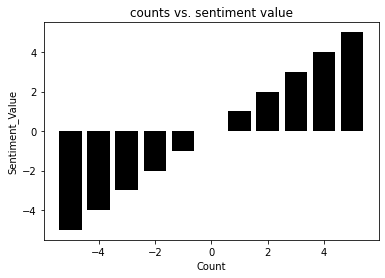

In [103]:

plt.bar(comment_sentiment_df['Sentiment_Value'], comment_sentiment_df['Sentiment_Value'], color='black')  
plt.xlabel('Count') 
plt.ylabel('Sentiment_Value') 
plt.title('counts vs. sentiment value')  
plt.show()

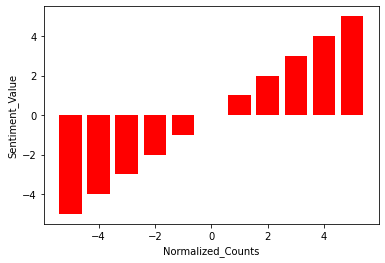

In [104]:

plt.bar(comment_sentiment_df['Sentiment_Value'], comment_sentiment_df['Sentiment_Value'], color='red')  
plt.xlabel('Normalized_Counts') 
plt.ylabel('Sentiment_Value') 
plt.title('')  
plt.show()

In [126]:
subreddit_2 = reddit.subreddit('vegeterian').hot(limit=number_of_posts)



subreddit_comments_2 = []


for post in tqdm(subreddit_2, total=number_of_posts):
    submission = reddit.submission(id=post)
    submission.comments.replace_more(limit=0)   
    for top_level_comment in submission.comments: 
        subreddit_comments_2.append(top_level_comment.body)  
        


subreddit_comments_df_2 = pd.DataFrame(data={'comment': subreddit_comments_2})
    

sentiments_df_2 = {"-5": 0, "-4": 0, "-3": 0, "-2": 0, "-1": 0, "0": 0, "1": 0, "2": 0, "3": 0, "4": 0, "5": 0}

for comment in subreddit_comments_df_2['comment']: 
        comment_words = word.split() 
        for word in comment_words: 
            word = word.strip('?:!.,;"!@()#-')  
            word = word.replace("\n", "")  
            if word in scores.keys():  
                score = scores[word]  
                sentiments_2[str(score)] += 1  
                

comment_sentiment_df_2 = pd.DataFrame(data={'Sentiment_Value': list(sentiments_2.keys()), 'Counts': list(sentiments_2.values())})

comment_sentiment_df_2['Sentiment_Value'] = comment_sentiment_df_2['Sentiment_Value'].astype('int')


comment_sentiment_df_2['Normalized_Counts'] = comment_sentiment_df_2['Counts'] / comment_sentiment_df_2['Counts'].sum()  # Normalize the Count
comment_sentiment_df_2

NameError: name 'scores' is not defined

No handles with labels found to put in legend.


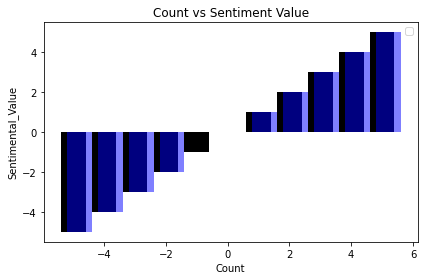

In [132]:

plt.bar(comment_sentiment_df['Sentiment_Value'], comment_sentiment_df['Sentiment_Value'], color='black', label='') 


plt.bar(comment_sentiment_df_2['Sentiment_Value'] + 0.2, comment_sentiment_df_2['Sentiment_Value'], color='blue', label='', alpha=0.5) 
plt.legend()  

plt.xlabel('Count')  
plt.ylabel('Sentimental_Value')  
plt.title('Count vs Sentiment Value')  
plt.tight_layout()  
plt.show()  

No handles with labels found to put in legend.


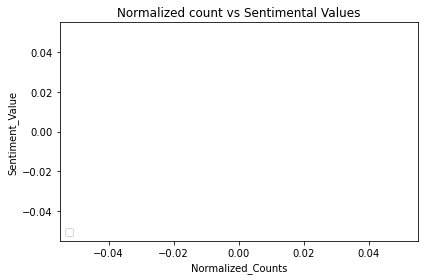

In [140]:

plt.bar(comment_sentiment_df['Sentiment_Value'], comment_sentiment_df['Normalized_Counts'], color='red', label='')  
ax = plt.gca()


plt.bar(comment_sentiment_df_2['Sentiment_Value'] + 0.2, comment_sentiment_df_2['Normalized_Counts'], color='black', label='', alpha=0.5) 
plt.legend() 

plt.xlabel('Normalized_Counts') 
plt.ylabel('Sentiment_Value')  
plt.title('Normalized count vs Sentimental Values') 
plt.tight_layout() 
plt.show() 